In [8]:
import numpy as np
import skimage.io as io
import skimage

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2



In [29]:

def accept(L,a,b):
    if np.abs(a+b) < 1 and L < 20: return True
    return False

def scan_lines(img):  
    
    lines = []

    rows , columns, channels= img.shape
    print(rows , columns, channels)
    
    
    for r in range(rows):   #for each column
        
        s = round(columns/2)
        x1 = s
        x2 = s
        
        #search to left
        for c in reversed(range(s+1)):
            red , green , blue , a = img[r,c]
            L , a , b = skimage.color.rgb2lab((red,green,blue))
            if not accept(L,a,b): break
            x1 = c
        #search to right
        for c in range(s,columns):
            red , green , blue , a = img[r,c]
            L , a , b = skimage.color.rgb2lab((red,green,blue))
            if not accept(L,a,b): break
            x2 = c
            
        lines.append((x1,x2))       
    
    return lines
            


def draw_image(path):
    I = io.imread(path)

    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);


    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(I)
    plt.show()

   
    
    lines = scan_lines(I)
    
    
    nimg = np.copy(I)
    y = 0
    for x1,x2 in lines:
        cv2.line(nimg,(x1,y),(x2,y),(255,255,255,255),thickness = 1)
        y += 1
   
    plt.imshow(nimg)
    plt.show()


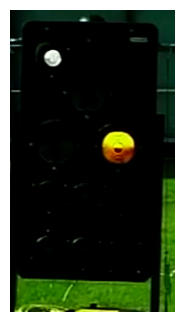

370 201 4


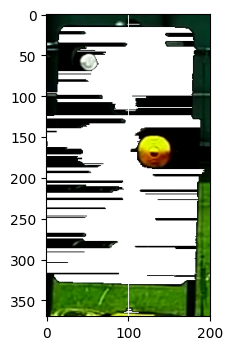

In [30]:
draw_image('../data/drohne-signals/traffic_light0032.png')

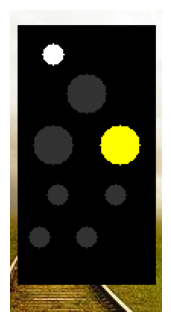

200 100 4


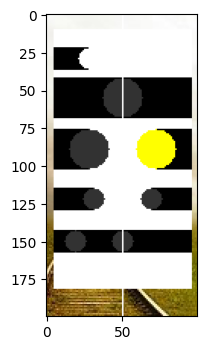

In [34]:
draw_image("../data/gen-signals/kshauptsignal2_Ks2_vBw.png")

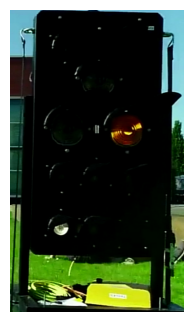

774 444 4


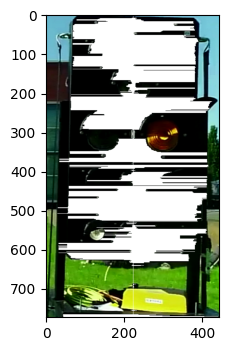

In [35]:
draw_image("../data/drohne-signals/traffic_light0011.png")

In [36]:
draw_image("../data/drohne-signals/traffic_light0029.png",0.5,10)

TypeError: draw_image() takes 1 positional argument but 3 were given

In [ ]:
I = io.imread("../data/drohne-signals/traffic_light0011.png")
r = 300


#I = io.imread("data/color_bubbles.png")
#r = 130

if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

rows , columns, channels= I.shape


x = []
y = []
yL = []
ya = []
yb = []

for c in range(columns):
    x.append(c)
    red , green , blue , a = I[r,c] 
    y.append(np.max([red,green,blue]))
    L , a , b = skimage.color.rgb2lab((red,green,blue))
    yL.append(L)
    ya.append(a)
    yb.append(b)


plt.plot(x,y)
plt.show()

plt.plot(x,ya,yb)
plt.show()

nimg = np.copy(I)
cv2.line(nimg,(0,r),(columns-1,r),(255,255,255),thickness = 1)
plt.imshow(nimg)
   

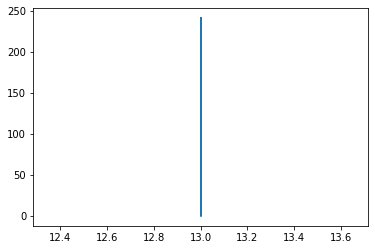

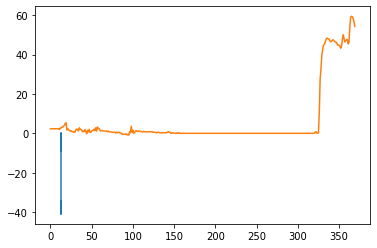

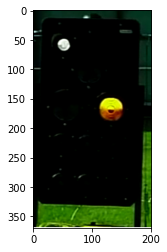

In [7]:
I = io.imread("../data/drohne-signals/traffic_light0032.png")
c = 13 #15

if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

rows , columns, channels= I.shape


x = []
y = []
yL = []
ya = []
yb = []

for r in range(rows):
    x.append(c)
    red , green , blue , a = I[r,c] 
    y.append(np.max([red,green,blue]))
    L , a , b = skimage.color.rgb2lab((red,green,blue))
    yL.append(L)
    ya.append(a)
    yb.append(b)


plt.plot(x,y)
plt.show()

plt.plot(x,ya,yb)
plt.show()

nimg = np.copy(I)
cv2.line(nimg,(0,r),(columns-1,r),(255,255,255),thickness = 1)
plt.imshow(nimg)


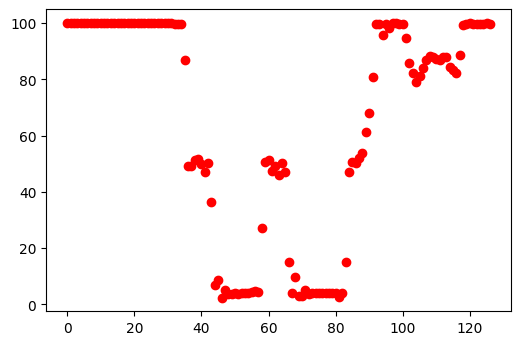

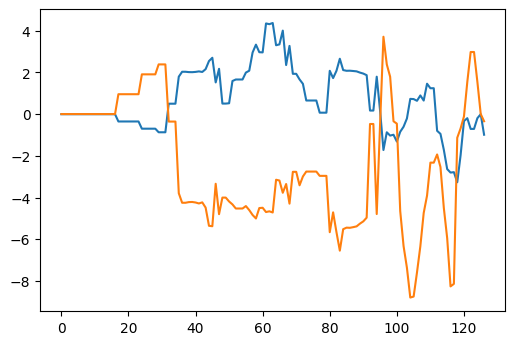

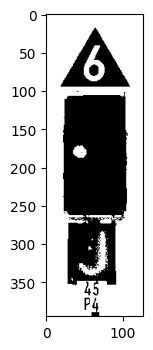

In [37]:

I = io.imread("../reports/20211006LMLS63460videomp4/images/115_original.png")

r = 50


if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

rows , columns, channels= I.shape

x = []
y = []
yL = []
ya = []
yb = []

for c in range(columns):
    x.append(c)
    red , green , blue , alpha = I[r,c] 
    L , a , b = skimage.color.rgb2lab((red,green,blue))
    yL.append(L)
    ya.append(a)
    yb.append(b)


plt.plot(x,yL,'ro')
plt.show()

plt.plot(x,ya,yb)
plt.show()

nimg = np.copy(I)
cv2.line(nimg,(0,r),(columns-1,r),(255,255,255),thickness = 1)
plt.imshow(nimg)

maxL = 20

img = np.zeros([rows , columns ,3],dtype=np.uint8)

for r in range(rows):
    for c in range(columns):
        red , green , blue , alpha = I[r,c] 
        L , a , b = skimage.color.rgb2lab((red,green,blue))
        if L > maxL: 
            img[r,c] = [255,255,255]
plt.imshow(img)

   